# Doing stats on the tagged data from the dashboard

This script written by **Shah Nafis Rafique** will attempt to find out any meaningful information from the tagged data that is made from the dashboard

Import the imports

In [1]:
import pandas as pd
import jsonpickle
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
import dateutil.parser

In [2]:
FILE_AS_ROOT = True
FILE_TO_ROOT = '../../../../../../'
JSON_FILE_TO_IMPORT = f"{ FILE_TO_ROOT if FILE_AS_ROOT else '../'}tagging_data_personal.json" 
SCRIPT_PATH = "./src/python/psic/stats/tagging_stats"
FILE_TO_TAG_RATIO = f"{'./' if FILE_AS_ROOT else './src/python/psic/stats/tagging_stats'}tag_ratio.csv"
TAGGING_STATES_FOLDER = f"{ FILE_TO_ROOT if FILE_AS_ROOT else '../'}tagging_json_states"

Used to get a pickgle at a specified path.

In [3]:
def get_pickle(path_to_file):
    with open(JSON_FILE_TO_IMPORT, 'r') as f:
        return jsonpickle.decode(f.read())

Function to display some information about the json pickle file.

In [4]:
def how_many_tagged(pickle_file,time):
    done_tagging_count=len(pickle_file.finished_tagged_queue)

    tagged_but_not_done_count=0
    for image in pickle_file.pending_images_queue:
        if len(image.get_taggers()) > 0:
            tagged_but_not_done_count-=-1

#     print(f"{tagged_but_not_done_count} images have been tagged, but not completely")
#     print(f"{done_tagging_count} images have been tagged completely")
#     print(f"{tagged_but_not_done_count+done_tagging_count} images have been tagged, completely or not")
    
    return pd.DataFrame([{ 
        'not_done':tagged_but_not_done_count,
        'done':done_tagging_count,
        'time':time
     }])

In [5]:
def add_tag_ratio(df):
    df['completed_tag_ratio']=df[['not_done']].iloc[:,0].divide(df[['not_done','done']].sum(axis=1))
    return df

Get the json pickle

In [6]:
data = get_pickle(JSON_FILE_TO_IMPORT)

View the tagged ratio log

In [7]:
tag_ratio_data = pd.read_csv(FILE_TO_TAG_RATIO)
tag_ratio_data = tag_ratio_data.sort_values(by="time")
tag_ratio_data.head()

,not_done,done,time
0,73,184,1573667040
1,117,248,1573965434


Add a column to show not completed vs total tagged images

In [8]:

tag_ratio_data.head()

,not_done,done,time
0,73,184,1573667040
1,117,248,1573965434


In [9]:
# tag_ratio_data[['completed_tag_ratio']].plot.line()

In [10]:
TOTAL_JSON_STATES = (len([name for name in os.listdir(TAGGING_STATES_FOLDER) if os.path.isfile(os.path.join(TAGGING_STATES_FOLDER, name))]))

In [11]:
path = os.getcwd()
files = os.listdir("/home/namenai/Documents/GitKraken/tagging_json_states")
files_json = [f for f in files if f[-4:] == 'json']
files_json.sort()
# files_json = sorted(files_json)

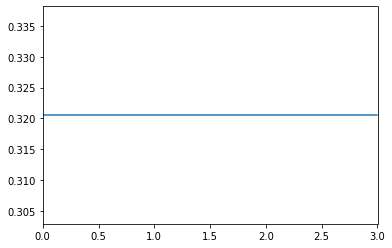

In [15]:
lst = list(range(TOTAL_JSON_STATES))
total_tag_ratio_df=pd.DataFrame()

for file in files_json[-4:]:
    remove_name = file.split('assigner_state-root-')[-1]
    date_string = remove_name.split('.json')[0]
    time = dateutil.parser.parse(date_string).strftime('%s')
    
    tagged_info = how_many_tagged(get_pickle(file),time)
    tagged_info = add_tag_ratio(tagged_info)
    total_tag_ratio_df = total_tag_ratio_df.append(tagged_info,ignore_index=True)
    
total_tag_ratio_df['completed_tag_ratio'].plot.line()